# This task is about understanding the EDA (Exploratory Data Analysis)

In [1]:
# Imports

import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# parameters

DATASET_URL = "https://raw.githubusercontent.com/SAI-SRINIVASA-SUBRAMANYAM/eda_algerian_forest_fire/main/Algerian_forest_fires_dataset_UPDATE.csv"
DATASET_STRUCT_URL = "https://raw.githubusercontent.com/SAI-SRINIVASA-SUBRAMANYAM/eda_algerian_forest_fire/main/Algerian_forest_fires_dataset_structure.json"
REGION_BEJAIA = "Bejaia"
REGION_SIDI_BEL_ABBES = "Sidi-Bel Abbes"
NUMERICAL_FEATURE = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
CATEGORAL_FEATURE = ['Classes', 'region']

In [3]:
# reading data
df = pd.read_csv(DATASET_URL, header=1)
df_struct = pd.read_json(DATASET_STRUCT_URL)

In [4]:
# adding region

df["region"] = ""

In [5]:
# imputation of region into data frame

if len(df[df["day"] == "day"].index) > 0 and len(df[(df["month"].isna()) & (df["day"] != "")].index) > 0:
    df.iloc[0:122, [-1]] = REGION_BEJAIA
    df.iloc[122:, [-1]] = REGION_SIDI_BEL_ABBES
    df.drop(index = df[df["day"] == "day"].index, inplace=True)
    df.drop(index = df[(df["month"].isna()) & (df["day"] != "")].index, inplace=True)
    print("Data purified.")
else:
    print("Data already purified!")

Data purified.


In [6]:
# Sample data over view

pd.concat([df[df["region"] == REGION_BEJAIA].head(), df[df["region"] == REGION_SIDI_BEL_ABBES].head()])

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi-Bel Abbes
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi-Bel Abbes
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi-Bel Abbes
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,Sidi-Bel Abbes
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,Sidi-Bel Abbes


In [7]:
df[(df["region"] == REGION_SIDI_BEL_ABBES) & (df["day"] == "14")]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
137,14,06,2012,27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3,not fire,Sidi-Bel Abbes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,fire,Sidi-Bel Abbes
198,14,08,2012,37,40,13,0,91.9,22.3,55.5,10.8,22.3,15.7,fire,Sidi-Bel Abbes
229,14,09,2012,28,81,15,0,84.6,12.6,41.5,4.3,14.3,5.7,fire,Sidi-Bel Abbes


In [42]:
# Convestion of type

df.columns = [column.strip() for column in df.columns]

for num_feature in NUMERICAL_FEATURE:
#     df[num_feature] = df[num_feature].str.replace(' ', '')
    df[num_feature] = df[num_feature].astype(np.float32)
    
for cat_feature in CATEGORAL_FEATURE:
    df[cat_feature] = df[cat_feature].str.strip()
    df[cat_feature] = df[cat_feature].astype('category')
    

df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [47]:
# Dropping year column as data is from a particular year

df.drop(['year'], axis=1, inplace=True)

# Data insights

In [9]:
# Shape of data frame

count, _ = df.shape

In [10]:
# Information of data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   day          244 non-null    object  
 1   month        244 non-null    object  
 2   year         244 non-null    object  
 3   Temperature  244 non-null    float32 
 4   RH           244 non-null    float32 
 5   Ws           244 non-null    float32 
 6   Rain         244 non-null    float32 
 7   FFMC         244 non-null    float32 
 8   DMC          244 non-null    float32 
 9   DC           244 non-null    float32 
 10  ISI          244 non-null    float32 
 11  BUI          244 non-null    float32 
 12  FWI          244 non-null    float32 
 13  Classes      244 non-null    category
 14  region       244 non-null    category
dtypes: category(2), float32(10), object(3)
memory usage: 17.9+ KB


In [11]:
# datatypes

df.dtypes

day              object
month            object
year             object
Temperature     float32
RH              float32
Ws              float32
Rain            float32
FFMC            float32
DMC             float32
DC              float32
ISI             float32
BUI             float32
FWI             float32
Classes        category
region         category
dtype: object

In [12]:
# memory usage

df.memory_usage()

Index          1952
day            1952
month          1952
year           1952
Temperature     976
RH              976
Ws              976
Rain            976
FFMC            976
DMC             976
DC              976
ISI             976
BUI             976
FWI             976
Classes         368
region          368
dtype: int64

# Feature observations

In [13]:
# missing features

values = []
for column in df.columns:
    values.append(df[column].isnull().sum())
df_struct['missing'] = values
df_struct['total_count'], _ = df.shape

In [14]:
# duplicate features

values = []
for column in df.columns:
    values.append(df[column].duplicated().sum())
df_struct['duplicate']  = values

In [15]:
# dtypes features

values = []
for column in df.columns:
    values.append(df[column].dtype)
df_struct['data_type']  = values

In [16]:
#Feature information

df_struct

,name,description,missing,total_count,duplicate,data_type
1,day,day,0,244,213,object
2,month,month,0,244,240,object
3,year,year,0,244,243,object
4,Temperature,temperature noon (temperature max) in Celsius ...,0,244,225,float32
5,RH,Relative Humidity in %: 21 to 90,0,244,182,float32
6,Ws,Wind speed in km/h: 6 to 29,0,244,226,float32
7,Rain,total day in mm: 0 to 16.8,0,244,205,float32
8,FFMC,Fine Fuel Moisture Code index from the FWI sys...,0,244,71,float32
9,DMC,Duff Moisture Code index from the FWI system: ...,0,244,78,float32
10,DC,Drought Code index from the FWI system: 7 to 2...,0,244,46,float32


In [17]:
# Statistical information

df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938526,15.504098,0.760656,77.887680,14.673360,49.288101,4.759836,16.673353,7.049180
std,3.633844,14.884201,2.810179,1.999407,14.337568,12.368040,47.619667,4.154628,14.201652,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075003,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.099998,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300003,20.750000,68.149998,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.799999,96.000000,65.900002,220.399994,19.000000,68.000000,31.100000


# Numerical feature

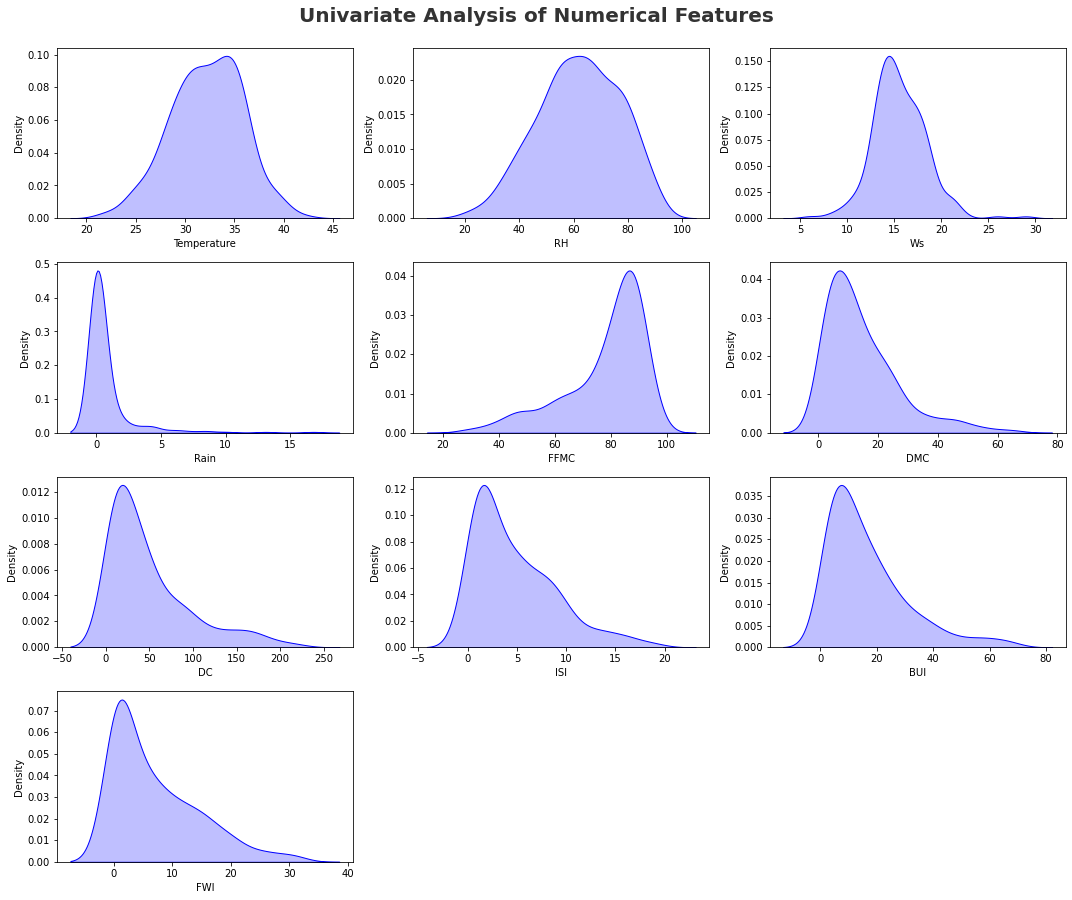

In [18]:
plt.figure(figsize=(15, 15))

plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for index, num_feature in enumerate(NUMERICAL_FEATURE):
    plt.subplot(5, 3, index+1)
    sns.kdeplot(x=df[num_feature],shade=True, color='b')
    plt.xlabel(num_feature)
    plt.tight_layout()

# One hot encoding

In [21]:
pd.get_dummies(df.Classes).sum()

fire        138
not fire    106
dtype: int64

# Feature analysis

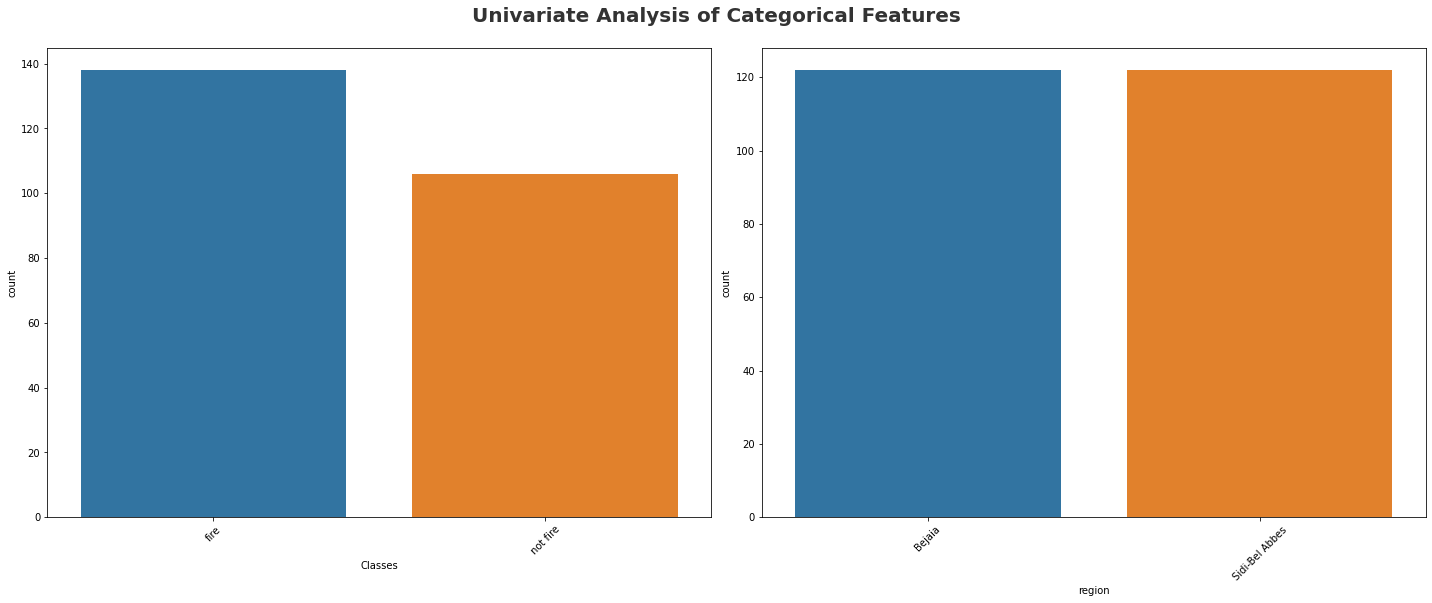

In [19]:
# categorical columns

plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for index, cat_feature in enumerate(CATEGORAL_FEATURE):
    plt.subplot(2, 2, index+1)
    sns.countplot(x=df[cat_feature])
    plt.xlabel(cat_feature)
    plt.xticks(rotation=45)
    plt.tight_layout()


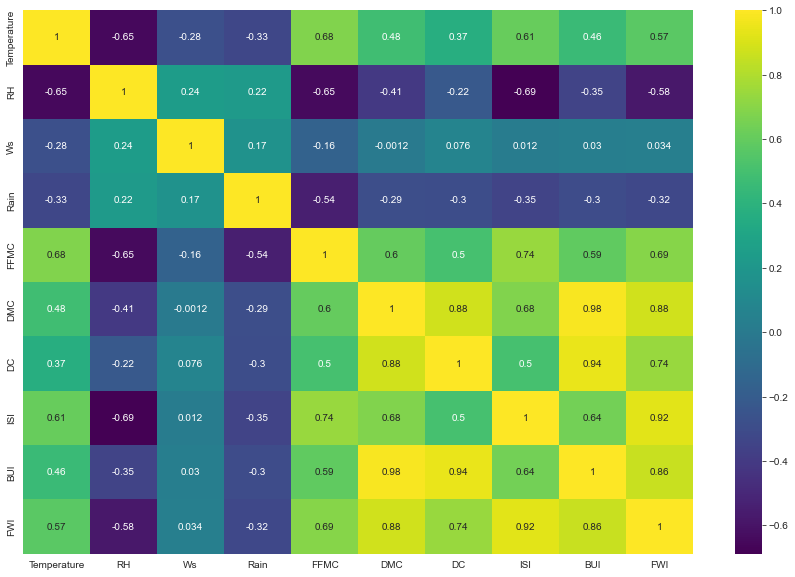

In [48]:
# Corelation plot

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="viridis", annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

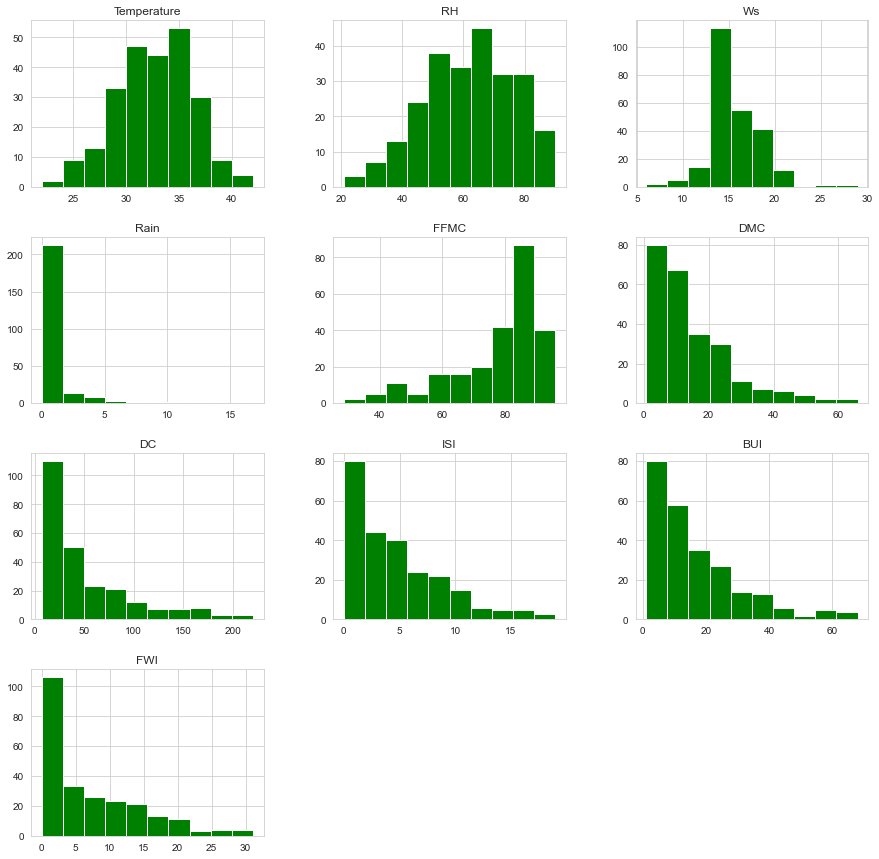

In [50]:
# Histogram

df.hist(figsize=(15, 15), color='g')

<AxesSubplot:xlabel='month', ylabel='Rain'>

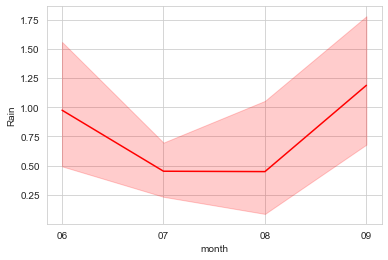

In [57]:
# Lineplot
# Comparison of Rain and Temperature

sns.lineplot(x='month', y='Rain', data=df, color= 'r')

<AxesSubplot:xlabel='month', ylabel='Temperature'>

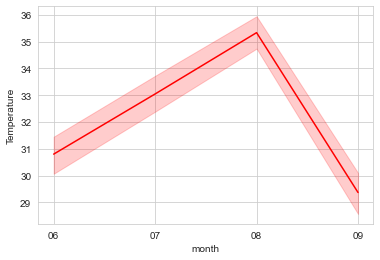

In [55]:
# Lineplot
# Comparison of month and Temperature


sns.lineplot(x='month', y='Temperature', data=df, color= 'r')

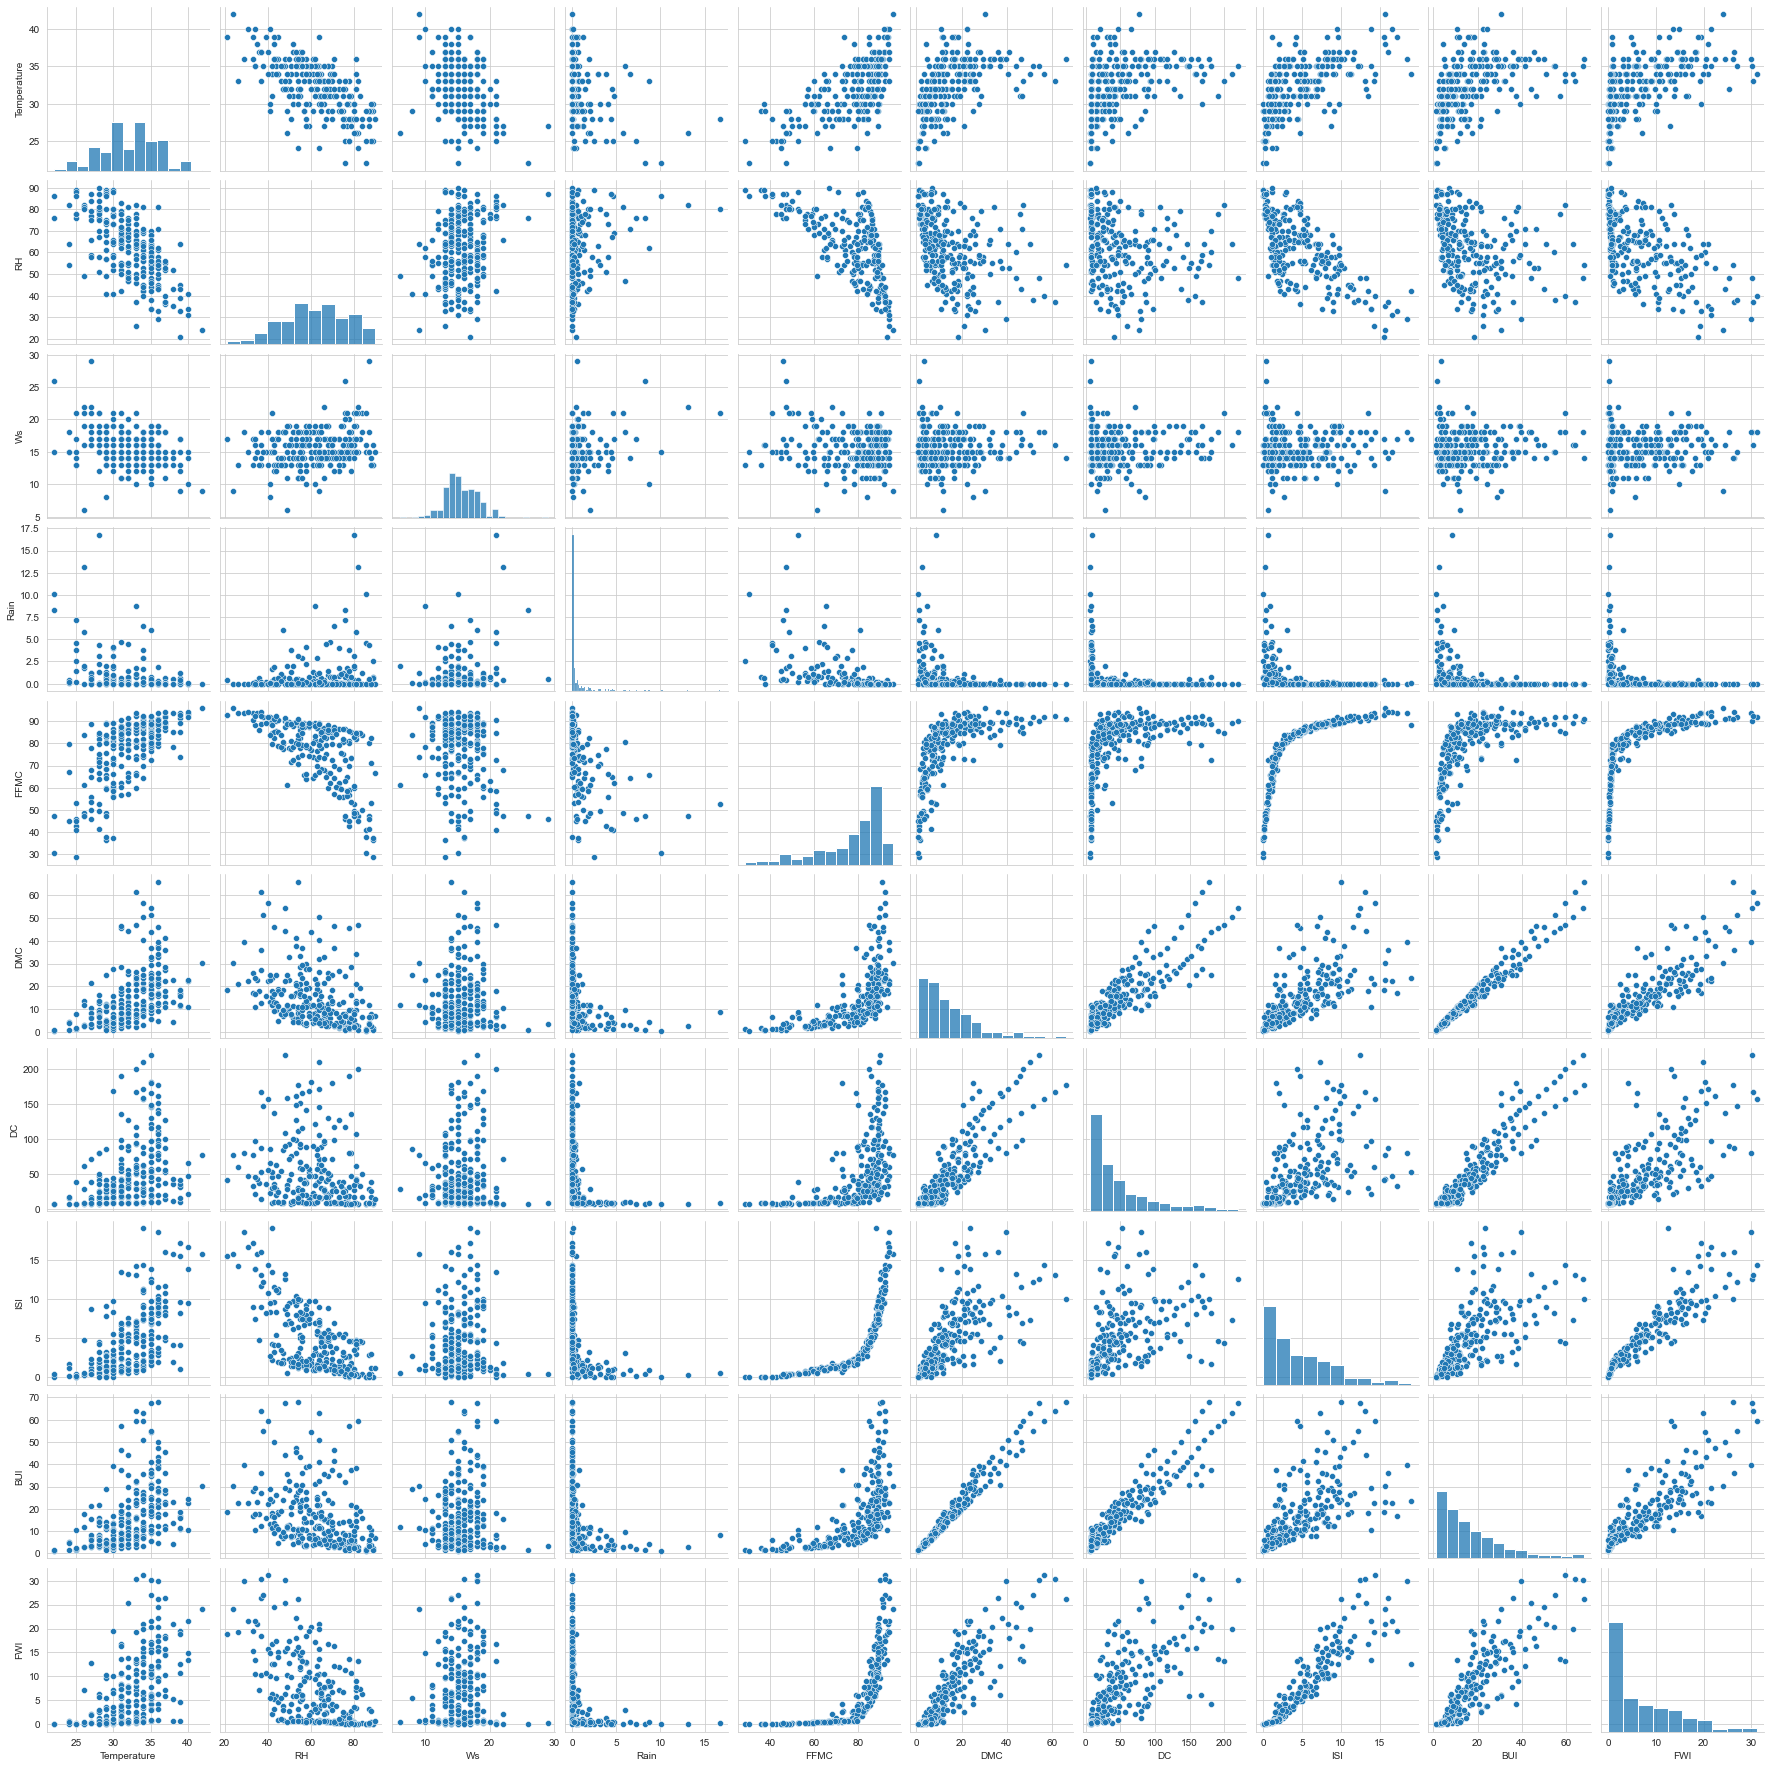

In [58]:
sns.pairplot(df)

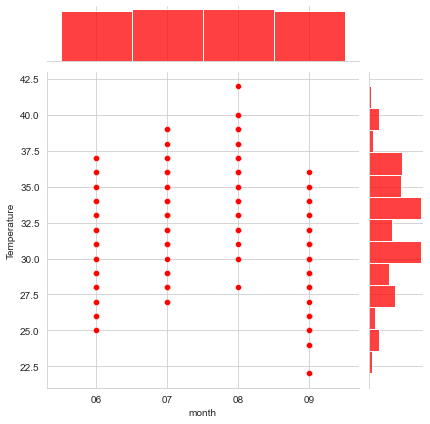

In [59]:
# Jointplot

sns.jointplot(x='month', y='Temperature', data=df, color='r')

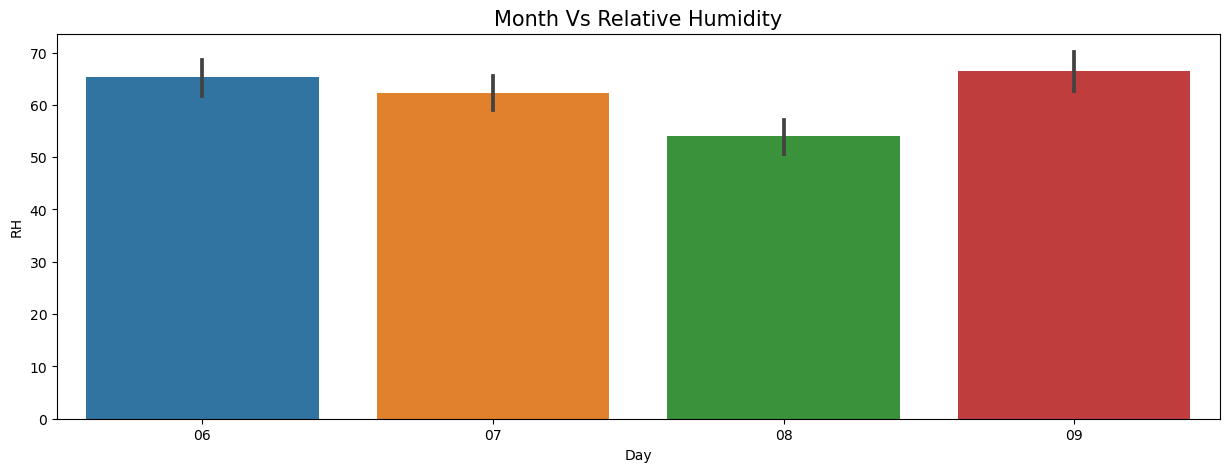

In [64]:
# Bar plot
plt.figure(figsize=(15, 5))
plt.style.use("default")
sns.barplot(x='month', y='RH', data=df)
plt.title('Month Vs Relative Humidity', fontsize=15)
plt.xlabel("Day")
plt.ylabel("RH")
plt.show()

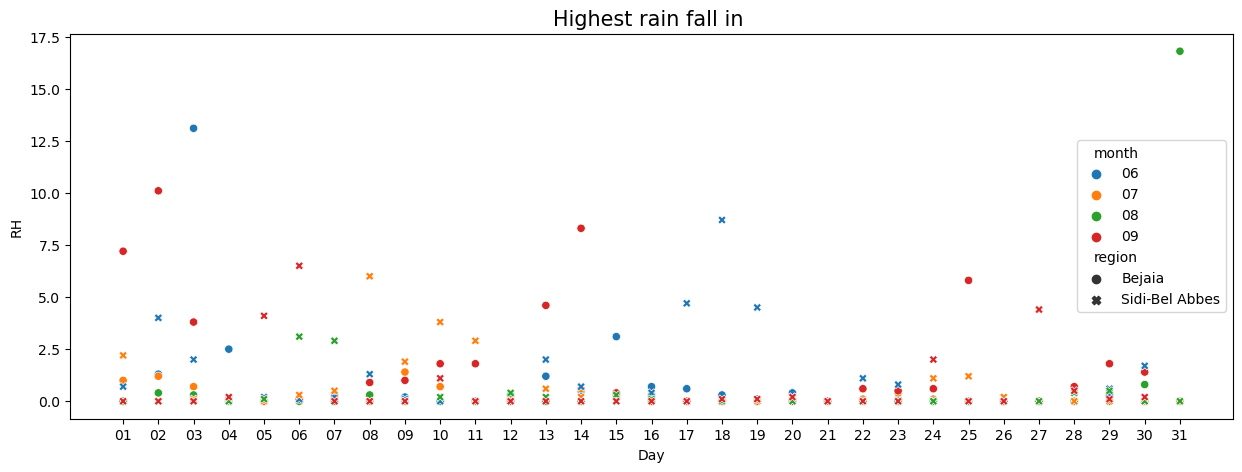

In [68]:

# Bar plot

plt.figure(figsize=(15, 5))
plt.style.use("default")
sns.scatterplot(x='day', y='Rain', hue='month', style='region', data=df)
plt.title('Highest rain fall in ', fontsize=15)
plt.xlabel("Day")
plt.ylabel("RH")
plt.show()

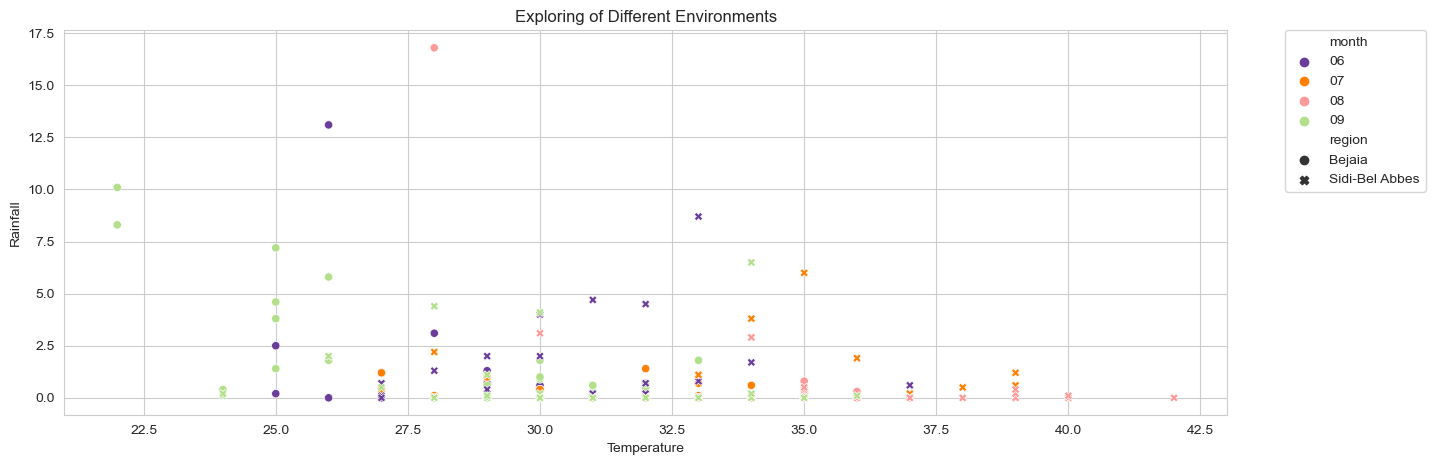

In [69]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(15, 5))

sns.scatterplot(
    data=df, 
    x='Temperature', 
    y='Rain',
    hue='month',
    style="region",
    palette='Paired_r'
    )

plt.title('Exploring of Different Environments')
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()


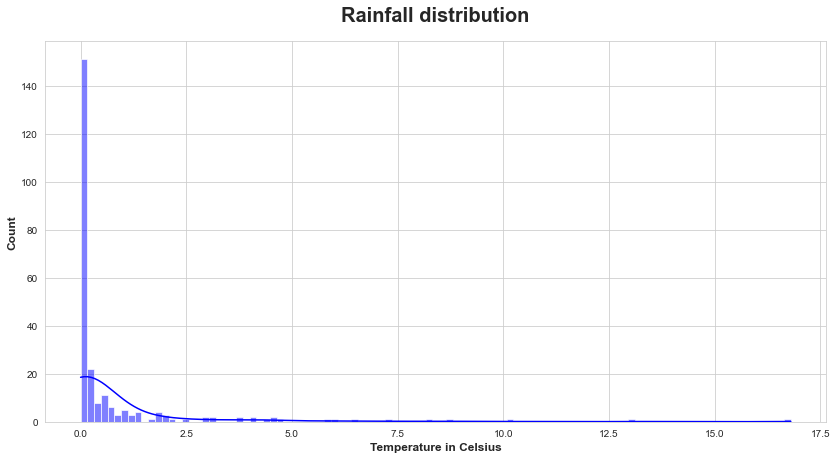

In [25]:
#Analysing rain fall distribution

plt.subplots(figsize=(14,7))
sns.histplot(df.Rain, kde=True, color = 'b')
plt.title("Rainfall distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Temperature in Celsius", weight="bold", fontsize=12)
plt.show()

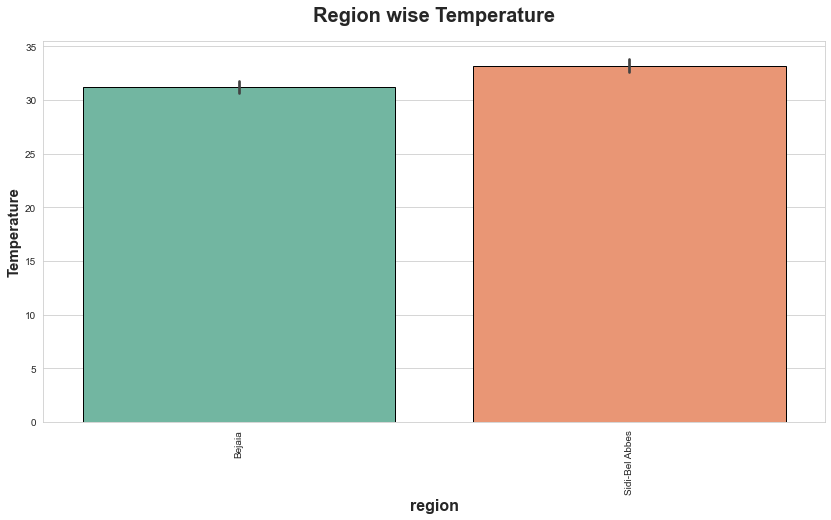

In [29]:
# Region wise temperature


plt.subplots(figsize=(14,7))
sns.barplot(x=df['region'], y= df['Temperature'], ec = "black",palette="Set2", )
plt.title("Region wise Temperature", weight="bold",fontsize=20, pad=20)
plt.ylabel("Temperature", weight="bold", fontsize=15)
plt.xlabel("region", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()